## Siting a Pizza Place in San Francisco

### 1. Introduction
#### Introduction/Business Problem

San Francisco Area without a doubt has many pizza places but most of these have been around a long time and the owners of these places lack creativity in bringing new experiences for the huge pizza lovers in the area and California as a whole. This problem is solved already by Maxwell's new pizza place that opened a year ago in the city of Sacramento and has brought many novel topings and other creative ideas that residents of Sacramento have come to love . It is the desire of Maxwell's to extend this to the city of San Francisco but learning from their experience in Sacramento,  they are trying to be careful in their choice of where to site their pizza places in San Francisco. Maxwell's is confident of the market their pizza place is going to attract but they want to run their businesses in safe environments. This is the question this project is trying to answer.

#### Audience

Primarily, this report is being prepared for Maxwell's Pizza but it will serve the need of any other new Pizza business looking to compete in San Francisco market.

### 2. Data for the Project 

We're definitely going to need data to answer the question. Luckily, the city of San Francisco has series of useful dataset which they have generously made available to the public. In addition to the San Francisco city dataset, we'll take advantage of the Foursquare API. We'll be using the registered businesses and crimes datasets from the city of San Francisco and then we get location and venue information through the foursquare API.



### 3. Methodology 

In this section we are going to make efforts to solve the problem and answer the research question. We begin by importing the libraries we need 

In [3]:
import numpy as np # library to handle data in a vectorized manner
import requests # library to handle requests
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage, we use init
from sklearn.cluster import KMeans


print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         393 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0

The following packages will be UPDATED:

  ca-certificates                     2020.4.5

Here we add the Foursquare API credentials 

In [4]:
CLIENT_ID = 'CFWMB2GE5SCDDUE0A4KB4520G5P4QPSCMTXXURP1RQ3UYP5J' # your Foursquare ID
CLIENT_SECRET = 'ZISWS12GJJZNQHJRAJ4Y12EYIK2YDPRLSDMNVM0GPVHREW5R' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CFWMB2GE5SCDDUE0A4KB4520G5P4QPSCMTXXURP1RQ3UYP5J
CLIENT_SECRET:ZISWS12GJJZNQHJRAJ4Y12EYIK2YDPRLSDMNVM0GPVHREW5R


As stated already in the introduction, we'll be using businesses and crimes dataset from the city of San Francisco to answer the question. We proceed by gathering the registered business data for the city of San Francisco

In [5]:
bus = pd.read_csv('https://data.sfgov.org/api/views/g8m3-pdis/rows.csv?accessType=DOWNLOAD')
print(bus.shape)
bus.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (12,13,14,15,21,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(258495, 36)


,Location Id,Business Account Number,Ownership Name,DBA Name,Street Address,City,State,Source Zipcode,Business Start Date,Business End Date,Location Start Date,Location End Date,Mail Address,Mail City,Mail Zipcode,Mail State,NAICS Code,NAICS Code Description,Parking Tax,Transient Occupancy Tax,LIC Code,LIC Code Description,Supervisor District,Neighborhoods - Analysis Boundaries,Business Corridor,Business Location,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,DELETE - Zip Codes,DELETE - Fire Prevention Districts,DELETE - Supervisor Districts,DELETE - Current Police Districts,DELETE - Neighborhoods,DELETE - Police Districts
0,0404143-01-999,404143,Gepsr Llc,Entertainment Partners,Po Box 7837,Burbank,CA,91510.0,08/30/2006,02/21/2017,08/30/2006,02/21/2017,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1121337-09-161,1058392,"Bash, Inc.","Bash, Inc.",764 54th St.,Oakland,CA,94609.0,09/28/2016,09/30/2016,09/28/2016,09/30/2016,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1122247-10-161,1058834,Edgar Barrero,Edgar Barrero,5466 Roundtree Dr A,Concord,CA,94521.0,05/25/2016,05/30/2018,05/25/2016,05/30/2018,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1145483-05-171,1069805,Elmer Bungay,Elmer Bungay,517 Heath St,Milpitas,CA,95035.0,05/05/2017,05/05/2018,05/05/2017,05/05/2018,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1107771-08-161,1051654,Uber,Uber,414 A St,Daly City,CA,94014.0,01/01/2016,07/31/2018,01/01/2016,07/31/2018,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
# the columns we need
bus2 = bus[['Business Start Date','DBA Name', 'Neighborhoods - Analysis Boundaries']].copy()

# we remove rows with missing values
bus3 = bus2.dropna()

# format business start date to suit our need
bus3['Business Start Date'] = bus3['Business Start Date'].astype('datetime64[ns]') 

# we just look at areas that have seen the most businesses start in the last 15 years.
bus4 = bus3.loc[bus3['Business Start Date'] > '2005-01-01']

# we rename 'Neighborhoods - Analysis Boundaries' and 'DBA Name'
bus4.rename(columns={'Neighborhoods - Analysis Boundaries': 'Neighborhood'}, inplace = True)
bus4.rename(columns={'DBA Name': 'Businesses'}, inplace = True)

bus4.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Business Start Date,Businesses,Neighborhood
5,2019-07-31,L Amour Spa,Chinatown
74,2019-02-10,Imaginary Menagerie,Mission
76,2006-07-10,Gilstrap Randal,Bernal Heights
78,2018-01-01,Tal Yeshanov,Mission
81,2016-01-08,Zhen Xuan Li,Chinatown


We now find out how much each of the San Francisco neighborhood has been able to attract in the last 15 years

In [67]:

# aggregate of businesses in each neighborhood
bus5 = bus4.groupby('Neighborhood', as_index=False).count()
bus5.reset_index()
# we won't need business start date beyond here 
bus5.drop(columns = 'Business Start Date',inplace = True)
# order by number of businesses attracted and pick the top 10
bus6 = bus5.sort_values(by= ['Businesses'], ascending = False).head(10)
bus6.reset_index(drop=True)
bus6

,Neighborhood,Businesses
5,Financial District/South Beach,15760
18,Mission,8532
33,South of Market,6935
34,Sunset/Parkside,5900
0,Bayview Hunters Point,4748
25,Outer Richmond,3963
16,Marina,3602
2,Castro/Upper Market,3393
39,West of Twin Peaks,3342
35,Tenderloin,3257


In [68]:
# Here's the full list of neighborhoods and the businesses they have attracted
bus7 = bus5.sort_values(by= ['Businesses'], ascending = False)
bus7.reset_index(drop=True)
bus7

,Neighborhood,Businesses
5,Financial District/South Beach,15760
18,Mission,8532
33,South of Market,6935
34,Sunset/Parkside,5900
0,Bayview Hunters Point,4748
25,Outer Richmond,3963
16,Marina,3602
2,Castro/Upper Market,3393
39,West of Twin Peaks,3342
35,Tenderloin,3257


We may now plot this information to better appreciate how neighborhoods have fared in terms of how many businesses they have attracted in the last 15 years

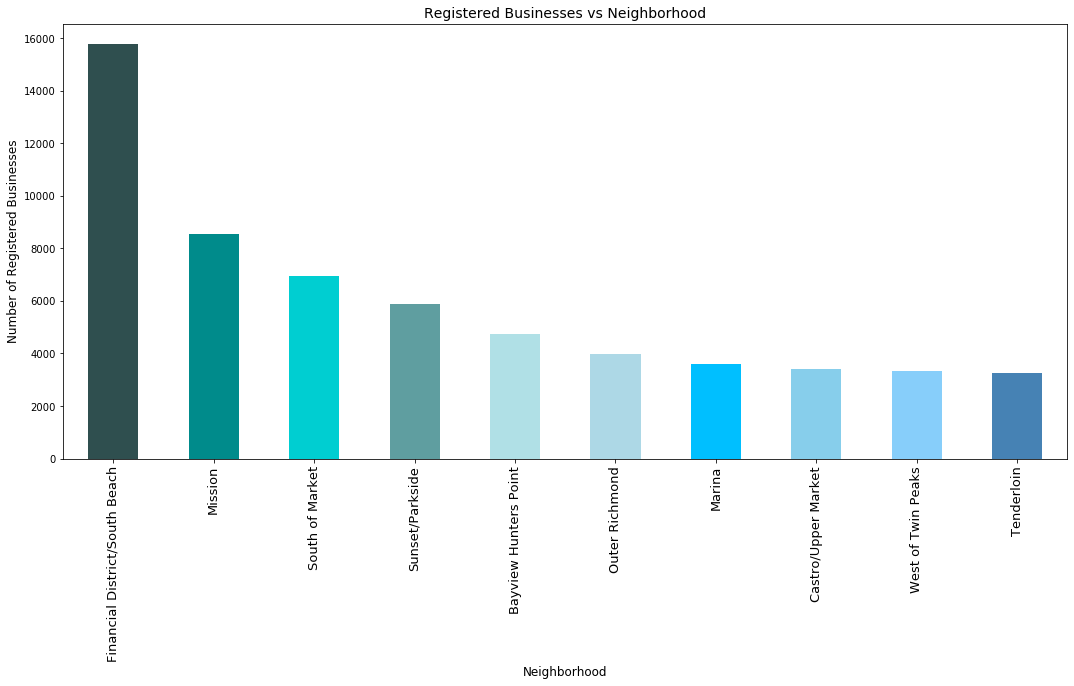

In [69]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

# we plot the top 10 neighborhoods
bus6.plot.bar(x = 'Neighborhood', y = 'Businesses', title = "Registered Businesses vs Neighborhood", legend = None, rot= 90, figsize = (18, 8), color=['darkslategray','darkcyan','darkturquoise','cadetblue', 'powderblue','lightblue','deepskyblue','skyblue','lightskyblue','steelblue'])
plt.ylabel('Number of Registered Businesses', fontsize=12)
plt.xticks(fontsize=13)
plt.xlabel('Neighborhood', fontsize=12)
plt.title('Registered Businesses vs Neighborhood', fontsize = 14)
plt.show()

Clearly the Financial District has attracted more businesses but all the other neighborhoods in the top 10 especially the last 5 are pretty close to each other so we will continue our analysis with the 10 neighborhoods.
As safe neighborhoods happen to be a huge factor for Maxwell's Pizza, we next go for the Crime data in San Francisco.

In [70]:
crime = pd.read_csv('https://data.sfgov.org/api/views/wg3w-h783/rows.csv?accessType=DOWNLOAD')
print(crime.shape)
crime.head()

(356937, 36)


,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,point,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,HSOC Zones as of 2018-06-05,OWED Public Spaces,Central Market/Tenderloin Boundary Polygon - Updated,Parks Alliance CPSI (27+TL sites),ESNCAG - Boundary File,"Areas of Vulnerability, 2016"
0,2019/05/01 01:00:00 AM,2019/05/01,01:00,2019,Wednesday,2019/06/12 08:27:00 PM,81097515200,810975,190424067,191634131.0,II,Initial,NaN,15200,Offences Against The Family And Children,Other,Domestic Violence (secondary only),Open or Active,40TH AVE \ IRVING ST,27789000.0,Taraval,Sunset/Parkside,4.0,37.762569,-122.499627,"(37.76256939715695, -122.49962745519909)",39.0,10.0,7.0,35.0,NaN,NaN,NaN,NaN,NaN,1.0
1,2019/06/22 07:45:00 AM,2019/06/22,07:45,2019,Saturday,2019/06/22 08:05:00 AM,81465564020,814655,190450880,191730737.0,II,Initial,NaN,64020,Non-Criminal,Other,Mental Health Detention,Open or Active,06TH ST \ MINNA ST,24285000.0,Southern,South of Market,6.0,37.780535,-122.408161,"(37.7805353858225, -122.40816079455212)",32.0,1.0,10.0,34.0,1.0,NaN,1.0,NaN,NaN,2.0
2,2019/06/03 04:16:00 PM,2019/06/03,16:16,2019,Monday,2019/06/03 04:16:00 PM,80769875000,807698,190397016,191533509.0,IS,Initial Supplement,NaN,75000,Missing Person,Missing Person,Found Person,Open or Active,EGBERT AVE \ INGALLS ST,20447000.0,Bayview,Bayview Hunters Point,10.0,37.721600,-122.390745,"(37.72159985216247, -122.39074534279013)",88.0,2.0,9.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0
3,2018/11/16 04:34:00 PM,2018/11/16,16:34,2018,Friday,2018/11/16 04:34:00 PM,73857915041,738579,180870806,183202539.0,IS,Initial Supplement,NaN,15041,Offences Against The Family And Children,Family Offenses,Elder Adult or Dependent Abuse (not Embezzleme...,Cite or Arrest Adult,MERCHANT ST \ KEARNY ST,24773000.0,Central,Chinatown,3.0,37.794860,-122.404876,"(37.794859532228344, -122.40487561154785)",104.0,6.0,3.0,6.0,NaN,18.0,NaN,NaN,NaN,2.0
4,2019/05/27 02:25:00 AM,2019/05/27,02:25,2019,Monday,2019/05/27 02:55:00 AM,80509204134,805092,190378555,191470256.0,II,Initial,NaN,4134,Assault,Simple Assault,Battery,Open or Active,LAGUNA ST \ UNION ST,26583000.0,Northern,Marina,2.0,37.797716,-122.430559,"(37.79771621229674, -122.43055896140594)",15.0,4.0,6.0,13.0,NaN,NaN,NaN,NaN,NaN,1.0


In [71]:
# we limit the data to just the columns we need
crime1 = crime[['Analysis Neighborhood','Incident Category', 'Incident Date']]

# leave out rows with missing values
crime2 = crime1.dropna()

# format incident date to suit our needs
crime2['Incident Date'] = crime2['Incident Date'].astype('datetime64[ns]') 

# we'll limit the crimes data to the last 5 years so that we only look at relevant crimes in recent times
crime3 = crime2.loc[crime2['Incident Date'] > '2015-01-01']

# To guard against being distracted by non-criminal incidents, we'll leave them out
crime4 = crime3.loc[crime3['Incident Category'] != 'Non-Criminal']

#change the name of 'Analysis Neighborhood' to 'Neighborhood'
crime4.rename(columns={'Analysis Neighborhood': 'Neighborhood'}, inplace = True)

crime4.head(10)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Neighborhood,Incident Category,Incident Date
0,Sunset/Parkside,Offences Against The Family And Children,2019-05-01
2,Bayview Hunters Point,Missing Person,2019-06-03
3,Chinatown,Offences Against The Family And Children,2018-11-16
4,Marina,Assault,2019-05-27
5,Financial District/South Beach,Burglary,2018-11-07
6,Lone Mountain/USF,Larceny Theft,2019-08-15
7,South of Market,Other Miscellaneous,2019-08-07
9,Russian Hill,Traffic Violation Arrest,2019-06-29
10,Castro/Upper Market,Drug Offense,2019-03-07
11,Hayes Valley,Sex Offense,2019-02-16


Just like we checked how much businesses each neighborhood attract, we want to see how well our neighborhoods attract crimes. For Maxwell's we want to identify neighborhoods with good business activities and few crimes

In [72]:
# crimes in each neighborhood
crime5 = crime4.groupby('Neighborhood', as_index=False).count()
# we wont need Incident Date beyond here
crime5.drop(columns = 'Incident Date',inplace = True)
# rename Incident Category column to a more descriptive name
crime5.rename(columns={'Incident Category': 'Incidents'}, inplace = True)
#and sort our values
crime6 = crime5.sort_values(by= ['Incidents'], ascending = False)
crime7 = crime6.head(10)
crime7

,Neighborhood,Incidents
18,Mission,36566
35,Tenderloin,32291
5,Financial District/South Beach,29585
33,South of Market,27165
0,Bayview Hunters Point,18877
40,Western Addition,10569
22,North Beach,9865
2,Castro/Upper Market,9696
20,Nob Hill,9341
34,Sunset/Parkside,9029


In [73]:
# Here's the full list of neighborhoods and how much crime they have atttracted they have attracted
crime6

,Neighborhood,Incidents
18,Mission,36566
35,Tenderloin,32291
5,Financial District/South Beach,29585
33,South of Market,27165
0,Bayview Hunters Point,18877
40,Western Addition,10569
22,North Beach,9865
2,Castro/Upper Market,9696
20,Nob Hill,9341
34,Sunset/Parkside,9029


We can have a graphical look at our crime rates in our top 10 neighborhoods

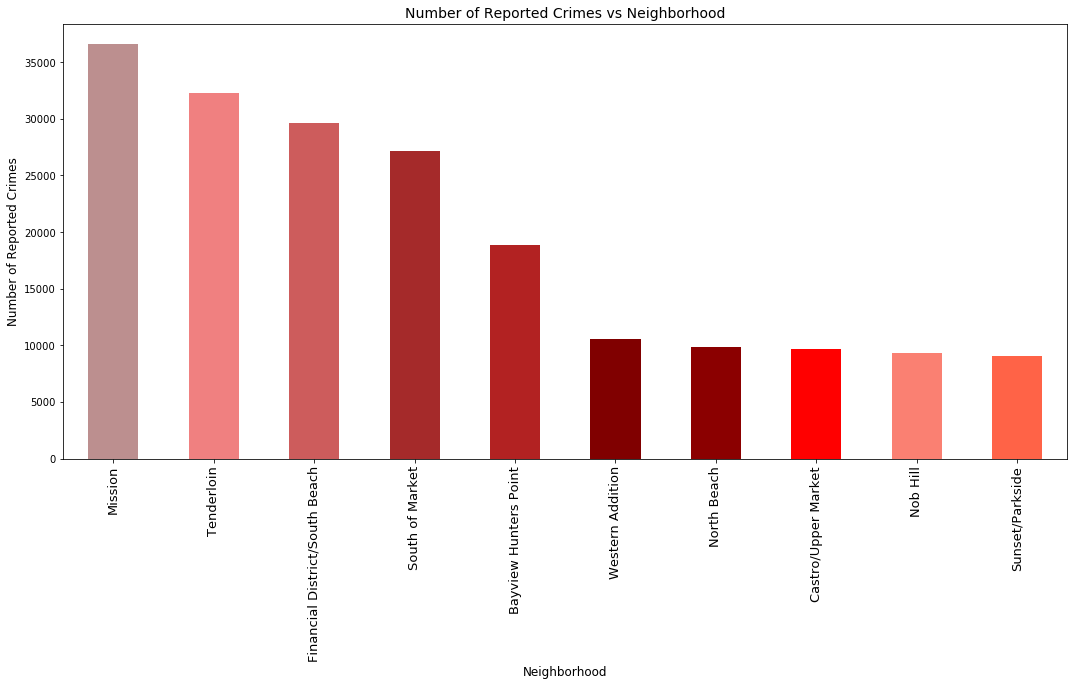

In [74]:

crime7.plot.bar(x = 'Neighborhood', y = 'Incidents', title = "Crime Incidents vs Neighborhood", legend = None, rot= 90, figsize = (18, 8), color=['rosybrown', 'lightcoral', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'salmon', 'tomato'])
plt.ylabel('Number of Reported Crimes', fontsize=12)
plt.xticks(fontsize=13)
plt.xlabel('Neighborhood', fontsize=12)
plt.title('Number of Reported Crimes vs Neighborhood', fontsize = 14)
plt.show()

It appears there are 5 neighborhoods with huge crime rates and the rest having roughly the same crime rates. We can merge the top crime and businesses data to see how far apart crimes count differ from businesses count for each neighborhood 

In [75]:
busCrime = pd.merge(bus7, crime6, on=['Neighborhood', 'Neighborhood'])
busCrime.head()

,Neighborhood,Businesses,Incidents
0,Financial District/South Beach,15760,29585
1,Mission,8532,36566
2,South of Market,6935,27165
3,Sunset/Parkside,5900,9029
4,Bayview Hunters Point,4748,18877


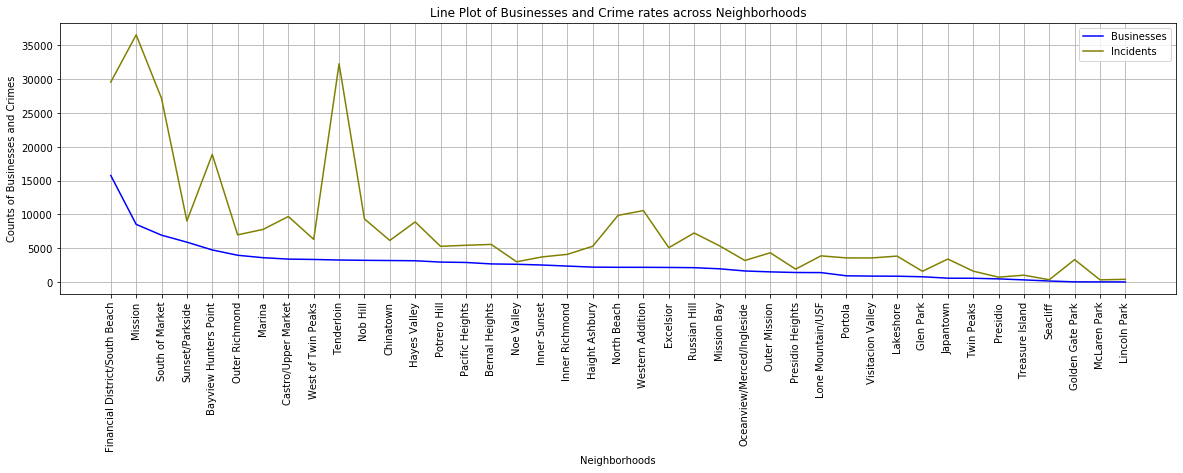

In [76]:
plt.figure(figsize=(20,5))
plt.plot( 'Neighborhood', 'Businesses', data=busCrime, marker='', color='blue')
plt.plot( 'Neighborhood', 'Incidents', data=busCrime, marker='', color='olive')
plt.xticks(rotation =90)
plt.xlabel("Neighborhoods")
plt.ylabel("Counts of Businesses and Crimes")
plt.title('Line Plot of Businesses and Crime rates across Neighborhoods')
plt.grid()
plt.legend()


From the multiple line plots above we can eyeball neighborhoods that has a good blend of decent business attraction and minimal crime rates. By far Mission neighborhood has the poorest combination of business and crime; the rate of business in Mission trails that of Financial district but crime rate in Mission clearly exceeds the rate in financial district. For example, among the top 5 neighborhoods in terms of businesses attraction, Sunset/Parkside shows a good blend. But we will investigate further before making any conclusions


From our top 10 neighborhoods in terms of business attraction, we want to take out the top 5 neighborhood in terms of crime rates. We would like to avoid these going forward.


In [77]:
# top 5 neighborhoods in terms of crime rate
crime8 = crime7.head(5)
crime8

,Neighborhood,Incidents
18,Mission,36566
35,Tenderloin,32291
5,Financial District/South Beach,29585
33,South of Market,27165
0,Bayview Hunters Point,18877


In [78]:
# nieghborhoods from the top 10 in terms of business attraction that happen to be among thos with top 5 neighborhoods in terms of crime rate
Overlap = bus6.merge(crime8, on=['Neighborhood'])
# neighborhoods from the top 10 in terms of business attraction that are not among neighborhoods with top 5 crime rates
SF_Neighborhoods = bus6[(~bus6.Neighborhood.isin(Overlap.Neighborhood))]
SF_Neighborhoods

,Neighborhood,Businesses
34,Sunset/Parkside,5900
25,Outer Richmond,3963
16,Marina,3602
2,Castro/Upper Market,3393
39,West of Twin Peaks,3342


This confirms what we found in the multiple line plot; Sunset/Parkside shows an excellent blend of business attraction and crime rate. Now we are going to get coordinates of each of our selected neighborhoods pulling the values from https://latlong.net which provides a free service for longitude and latitude of locations

In [79]:
SF_Neighborhoods.loc[SF_Neighborhoods.Neighborhood == 'Sunset/Parkside' , 'Coordinates'] = "(37.749690, -122.494880)"
SF_Neighborhoods.loc[SF_Neighborhoods.Neighborhood == 'Outer Richmond' , 'Coordinates'] = "(39.820580, -84.887010)"
SF_Neighborhoods.loc[SF_Neighborhoods.Neighborhood == 'Marina' , 'Coordinates'] = "(37.803850, -122.450350)"
SF_Neighborhoods.loc[SF_Neighborhoods.Neighborhood == 'Castro/Upper Market' , 'Coordinates'] = "(37.765730, -122.435470)"
SF_Neighborhoods.loc[SF_Neighborhoods.Neighborhood == 'West of Twin Peaks' , 'Coordinates'] = "(37.758430, -122.448440)"
SF_Neighborhoods

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Neighborhood,Businesses,Coordinates
34,Sunset/Parkside,5900,"(37.749690, -122.494880)"
25,Outer Richmond,3963,"(39.820580, -84.887010)"
16,Marina,3602,"(37.803850, -122.450350)"
2,Castro/Upper Market,3393,"(37.765730, -122.435470)"
39,West of Twin Peaks,3342,"(37.758430, -122.448440)"


We now merge our business, crime and coordinates data

In [80]:

SF = SF_Neighborhoods.merge(crime6, on=['Neighborhood'])
SF.rename(columns={'Incidents':'Crimes'}, inplace = True)
SF = SF[['Neighborhood', 'Businesses', 'Crimes','Coordinates']]
SF['Coordinates'].to_string()
SF[['Latitude','Longitude']] = SF['Coordinates'].str.strip('(').str.strip(')').str.split(', ', expand=True)

SF

,Neighborhood,Businesses,Crimes,Coordinates,Latitude,Longitude
0,Sunset/Parkside,5900,9029,"(37.749690, -122.494880)",37.749690,-122.494880
1,Outer Richmond,3963,6982,"(39.820580, -84.887010)",39.820580,-84.887010
2,Marina,3602,7782,"(37.803850, -122.450350)",37.803850,-122.450350
3,Castro/Upper Market,3393,9696,"(37.765730, -122.435470)",37.765730,-122.435470
4,West of Twin Peaks,3342,6316,"(37.758430, -122.448440)",37.758430,-122.448440


We now turn to Foursquare API. We use a function to search most popular venues within 1 mile (1609.34 meters) radius of our neighborhoods

In [82]:
def getSurroundingVenues(names, latitudes, longitudes, radius=1609.34):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
    
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    surrounding_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    surrounding_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(surrounding_venues)

In [83]:
# Here we invoke the getSurroundingVenues() function to get surrounding venues
SF_venues = getSurroundingVenues(names=SF['Neighborhood'],
                                   latitudes=SF['Latitude'],
                                   longitudes=SF['Longitude']
                                  )


Sunset/Parkside
Outer Richmond
Marina
Castro/Upper Market
West of Twin Peaks


In [84]:
# sanity check to be sure we have 30 venues for each neighborhood
print(SF_venues.shape)
SF_venues.head()

(150, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Sunset/Parkside,37.749690,-122.494880,Polly Ann Ice Cream,37.753454,-122.497765,Ice Cream Shop
1,Sunset/Parkside,37.749690,-122.494880,West Sunset Playground,37.750659,-122.497928,Playground
2,Sunset/Parkside,37.749690,-122.494880,Devil's Teeth Baking Company,37.753045,-122.505025,Bakery
3,Sunset/Parkside,37.749690,-122.494880,"Andytown Roastery, Training Lab & Coffee Supply",37.742142,-122.498566,Coffee Shop
4,Sunset/Parkside,37.749690,-122.494880,Andytown,37.756788,-122.502307,Coffee Shop


In [85]:
SF_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Castro/Upper Market,30,30,30,30,30,30
Marina,30,30,30,30,30,30
Outer Richmond,30,30,30,30,30,30
Sunset/Parkside,30,30,30,30,30,30
West of Twin Peaks,30,30,30,30,30,30


In [86]:
# the number of unique types of venues pulled
print('There are {} uniques categories.'.format(len(SF_venues['Venue Category'].unique())))

There are 86 uniques categories.


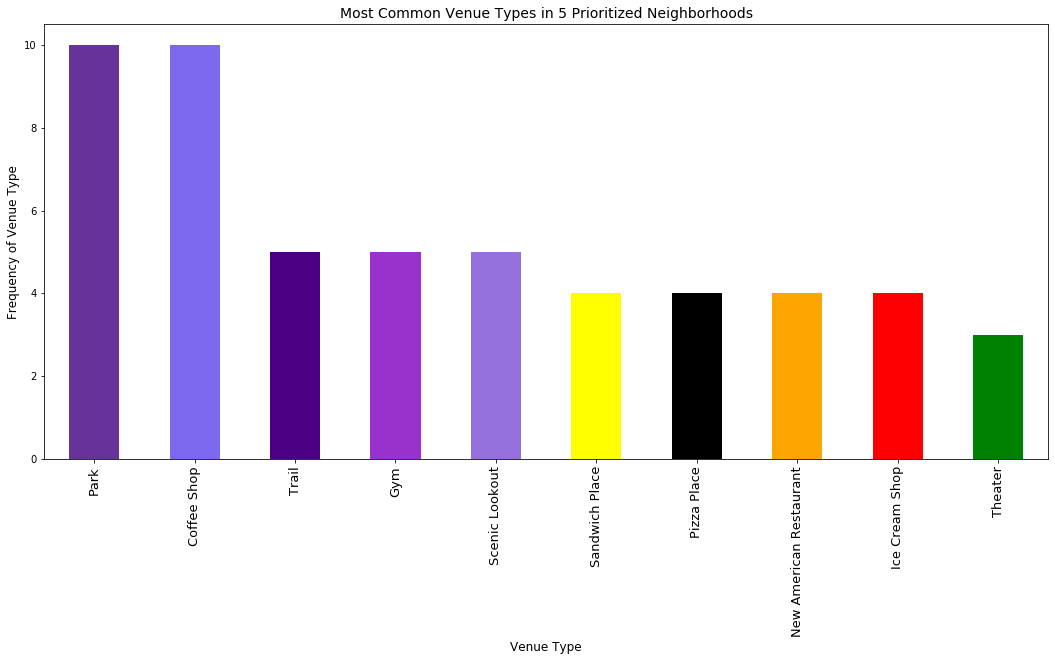

In [87]:
SF_top_venues = SF_venues.groupby('Venue Category', as_index = False).count().sort_values('Neighborhood', ascending = False).head(10)
SF_top_venues = SF_top_venues[['Venue Category','Neighborhood']]
SF_top_venues.rename(columns={'Neighborhood': 'Frequency'}, inplace = True)
SF_top_venues.plot.bar(x='Venue Category', y='Frequency', legend = None, title = "Most common venue types in 5 prioritized neighborhoods", rot= 90, figsize = (18, 8), color=['rebeccapurple','mediumslateblue','indigo','darkorchid','mediumpurple','yellow','black','orange','red','green'])
plt.ylabel('Frequency of Venue Type', fontsize=12)
plt.xticks(fontsize=13)
plt.xlabel('Venue Type', fontsize=12)
plt.title('Most Common Venue Types in 5 Prioritized Neighborhoods', fontsize = 14)
plt.show()

By far Parks and Coffee shops are the most common venue type around the 5 neighborhoods. Trail, Gyms and scenic look outs follow and lastly we have Ice cream shops, Pizza places and Sandwich places. We can further analyze this:

In [88]:
# one hot encoding
SF_onehot = pd.get_dummies(SF_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
SF_onehot['Neighborhood'] = SF_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [SF_onehot.columns[-1]] + list(SF_onehot.columns[:-1])
SF_onehot = SF_onehot[fixed_columns]

SF_onehot.head()

,Neighborhood,ATM,American Restaurant,Amphitheater,BBQ Joint,Bagel Shop,Bakery,Beach,Beer Bar,Bistro,Bookstore,Breakfast Spot,Bubble Tea Shop,Burger Joint,Café,Camera Store,Cheese Shop,Chinese Restaurant,Cocktail Bar,Coffee Shop,Concert Hall,Cycle Studio,Dance Studio,Deli / Bodega,Dim Sum Restaurant,Discount Store,Dive Bar,Dog Run,Donut Shop,Dumpling Restaurant,Empanada Restaurant,Event Space,Fast Food Restaurant,Field,Food,Fountain,French Restaurant,Gas Station,Gay Bar,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hill,Historic Site,History Museum,Ice Cream Shop,Indie Movie Theater,Japanese Restaurant,Korean Restaurant,Liquor Store,Mexican Restaurant,Middle Eastern Restaurant,Monument / Landmark,Mountain,Movie Theater,Museum,New American Restaurant,Office,Outdoor Sculpture,Park,Performing Arts Venue,Pharmacy,Pizza Place,Playground,Pool,Pub,Record Shop,Restaurant,Rock Club,Sandwich Place,Scenic Lookout,Spa,Sporting Goods Shop,Street Food Gathering,Szechuan Restaurant,Taco Place,Tennis Court,Theater,Tiki Bar,Tourist Information Center,Trail,Video Store,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,Sunset/Parkside,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Sunset/Parkside,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Sunset/Parkside,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Sunset/Parkside,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Sunset/Parkside,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [89]:
# we now aggregate the data
SF_grouped = SF_onehot.groupby('Neighborhood').mean().reset_index()
SF_grouped

,Neighborhood,ATM,American Restaurant,Amphitheater,BBQ Joint,Bagel Shop,Bakery,Beach,Beer Bar,Bistro,Bookstore,Breakfast Spot,Bubble Tea Shop,Burger Joint,Café,Camera Store,Cheese Shop,Chinese Restaurant,Cocktail Bar,Coffee Shop,Concert Hall,Cycle Studio,Dance Studio,Deli / Bodega,Dim Sum Restaurant,Discount Store,Dive Bar,Dog Run,Donut Shop,Dumpling Restaurant,Empanada Restaurant,Event Space,Fast Food Restaurant,Field,Food,Fountain,French Restaurant,Gas Station,Gay Bar,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hill,Historic Site,History Museum,Ice Cream Shop,Indie Movie Theater,Japanese Restaurant,Korean Restaurant,Liquor Store,Mexican Restaurant,Middle Eastern Restaurant,Monument / Landmark,Mountain,Movie Theater,Museum,New American Restaurant,Office,Outdoor Sculpture,Park,Performing Arts Venue,Pharmacy,Pizza Place,Playground,Pool,Pub,Record Shop,Restaurant,Rock Club,Sandwich Place,Scenic Lookout,Spa,Sporting Goods Shop,Street Food Gathering,Szechuan Restaurant,Taco Place,Tennis Court,Theater,Tiki Bar,Tourist Information Center,Trail,Video Store,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,Castro/Upper Market,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,0.100000,0.033333,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,0.033333
1,Marina,0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,0.033333,0.000000,0.100000,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333,0.033333,0.033333,0.033333,0.100000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333,0.033333,0.033333,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000
2,Outer Richmond,0.033333,0.066667,0.000000,0.033333,0.033333,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.100000,0.000000,0.000000,0.033333,0.000000,0.033333,0.033333,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000
3,Sunset/Parkside,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333,0.033333,0.000000,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,0.066667,0.033333,0.100000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.066667,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000

We can now see the top 20 common venues for each neighborhood

In [90]:
# return for each neighborhood the top 10 most common venues
num_top_venues = 20

for hood in SF_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = SF_grouped[SF_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Castro/Upper Market----
                      venue  freq
0               Coffee Shop  0.10
1   New American Restaurant  0.10
2                      Park  0.10
3               Yoga Studio  0.03
4       Japanese Restaurant  0.03
5       Indie Movie Theater  0.03
6      Gym / Fitness Center  0.03
7                       Gym  0.03
8                   Gay Bar  0.03
9         French Restaurant  0.03
10              Event Space  0.03
11                  Dog Run  0.03
12           Sandwich Place  0.03
13           Scenic Lookout  0.03
14             Cycle Studio  0.03
15             Concert Hall  0.03
16             Liquor Store  0.03
17             Tennis Court  0.03
18             Burger Joint  0.03
19                    Trail  0.03


----Marina----
                      venue  freq
0                       Gym  0.10
1                      Park  0.10
2               Coffee Shop  0.07
3       Sporting Goods Shop  0.03
4                       Spa  0.03
5         Outdoor Sculpture  0.03
6  

Looking at the result of the Top 20 venues in each of the 5 neighborhoods, only Outer Richmond and Sunset/Parkside have Pizza Place in the list. This shows that there is a thriving market for Pizzas in these 2 neighborhoods. Since Maxwells's is ready to compete, these 2 neighborhoods should be the right neighborhoods. With Pizza's Place being the most popular venue in Outer Richmond, we'd expect this neighborhood to have a good population of Pizza lovers who are going to appreciate what Maxwell's has to offer. Lastly, we can cluster our neighborhoods using k-means to see if clustering algorithm agrees with the intuition from our analysis. We will set init to kmeans++ to guard against the effect of randomization on inital centroid placement of centroids

In [91]:
# set number of clusters to see what neighborhoods get into the same cluster
kclusters = 2

SF_grouped_clustering = SF_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0, init='k-means++').fit(SF_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:5]

array([0, 0, 1, 1, 0], dtype=int32)

In [92]:
SF_grouped.insert(1, 'Cluster Labels', kmeans.labels_)
SF_grouped

,Neighborhood,Cluster Labels,ATM,American Restaurant,Amphitheater,BBQ Joint,Bagel Shop,Bakery,Beach,Beer Bar,Bistro,Bookstore,Breakfast Spot,Bubble Tea Shop,Burger Joint,Café,Camera Store,Cheese Shop,Chinese Restaurant,Cocktail Bar,Coffee Shop,Concert Hall,Cycle Studio,Dance Studio,Deli / Bodega,Dim Sum Restaurant,Discount Store,Dive Bar,Dog Run,Donut Shop,Dumpling Restaurant,Empanada Restaurant,Event Space,Fast Food Restaurant,Field,Food,Fountain,French Restaurant,Gas Station,Gay Bar,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hill,Historic Site,History Museum,Ice Cream Shop,Indie Movie Theater,Japanese Restaurant,Korean Restaurant,Liquor Store,Mexican Restaurant,Middle Eastern Restaurant,Monument / Landmark,Mountain,Movie Theater,Museum,New American Restaurant,Office,Outdoor Sculpture,Park,Performing Arts Venue,Pharmacy,Pizza Place,Playground,Pool,Pub,Record Shop,Restaurant,Rock Club,Sandwich Place,Scenic Lookout,Spa,Sporting Goods Shop,Street Food Gathering,Szechuan Restaurant,Taco Place,Tennis Court,Theater,Tiki Bar,Tourist Information Center,Trail,Video Store,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,Castro/Upper Market,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,0.100000,0.033333,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,0.033333
1,Marina,0,0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,0.033333,0.000000,0.100000,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333,0.033333,0.033333,0.033333,0.100000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333,0.033333,0.033333,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000
2,Outer Richmond,1,0.033333,0.066667,0.000000,0.033333,0.033333,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.100000,0.000000,0.000000,0.033333,0.000000,0.033333,0.033333,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000
3,Sunset/Parkside,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333,0.033333,0.000000,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,0.066667,0.033333,0.100000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.066667,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.033333,0.0

Again we see from the Cluster Labels column that Outer Richmond and Sunset/Parkside are grouped into the same cluster by k-means

### 4. Results and Discusion 

In this task we have pulled data on crime rate and business attraction for neighborhoods in San Francisco and used the information to answer the question of where to site a new Pizza Place in San Francisco that can provide a good combination of patronage and low crime rates. We identified 10 best neighborhood in terms of how well they have attracted businesses and from these we took out 5 neighborhoods that even though attract businesses but also have very high crime rates. Our analysis showed that:
- Financial District and Mission neighborhoods attract huge amount of businesses but also attracts the highest crime rates in San Francisco
- Coffee shops, Parks, Ice cream shops, Trails, Gyms, Scenic Lookout, Pizza Places and American Restaurants are the most common venues in the 5 preferred neighborhoods
- Clustering neighborhoods based on their most popular venues grouped into 2 clusters resulted in Outer Richmond and Sunset/Parkside falling into the same cluster while Castro/Upper Market, Marina and West of Twin Peaks in another cluster.
- It turned out the most common venues in Outer Richmond are Pizza Places. Sunset/Parkside also has a bit of presence of Pizza places. Pizza places do not appear to be common in Other Neighborhoods.

Our analysis shows that Pizza Places is not very common in our prefered neighborhoods (those with good business inflow and relatively low crime rates) except for Outer Richmond and Sunset/Parkside.  This shows that there is a thriving market for Pizzas in these 2 neighborhoods. Since Maxwells's is ready to compete, these 2 neighborhoods should be the right neighborhoods. With Pizza's Place being the most popular venue in Outer Richmond, we'd expect this neighborhood to have a good population of Pizza lovers who are going to appreciate what Maxwell's has to offer.

### 5. Conclusion 

In this data science capstone project, we have used common python libraries to manipulate data sets and Foursquare API to explore the neighborhoods of San Francisco. We used K-means clustering algorithm to verify the intuition we found through analysis which supported our observation. We would have liked to use the geocoding API but it's not available for free. In the future we would attempt a time series analysis of businesses and crimes in neighborhoods so we can observe the trend and guard against basing our judgement on trends overall history which could have changed.